In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [39]:
df = pd.read_csv('..\Initial_data\K5P4_1\K5P4_1_cor.csv', sep=";")
df

,K0P125.PV,K5Q2_2.PV,K5FCV4_2I.PV,K5P6.PV,K5PCV6I.PV,K5PCV17_1I.PV,K5P17_1.PV,K5PCV17_2I.PV,K5P17_2.PV,K5F3.PV,...,K5T12.PV,K5P13.PV,K5HCV60I.PV,K5P16_1.PV,K5GKAL.PV,K5HCV61I.PV,K5P16_2.PV,K5FCV4_1I.PV,K5Q2_1.PV,K5P4_1.PV
0,67.27675,327.7604,7.567240,0.799818,94.63021,72.83281,5.713502,98.70692,5.543893,2106.518,...,152.0324,3.983025,97.38812,0.532047,15.29541,97.78464,0.604910,5.450104,368.9479,10.97927
1,67.65375,326.8594,7.536094,0.800297,94.62411,72.83244,5.741667,98.69563,5.572396,2111.003,...,151.9718,3.981728,97.37245,0.527215,15.38140,97.80542,0.609322,5.453073,370.0990,11.02042
2,67.24300,324.4740,7.531302,0.800605,94.61849,72.82568,5.678802,98.69583,5.515924,2099.278,...,151.9571,3.980113,97.40734,0.533984,15.35248,97.83432,0.608432,5.451042,368.3698,10.91922
3,67.69209,324.8229,7.550416,0.800251,94.62698,72.85719,5.725313,98.69218,5.557461,2107.771,...,151.9323,3.979872,97.41817,0.531675,15.33855,97.83901,0.609033,5.426406,372.7656,10.99307
4,67.28242,325.9219,7.537240,0.800182,94.62495,72.84661,5.677773,98.69594,5.517148,2099.952,...,151.9283,3.978566,97.36542,0.548240,15.33628,97.78313,0.604587,5.448646,369.5052,10.91474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,66.38567,589.3802,19.430160,1.799510,97.58041,73.25438,11.744010,98.98515,11.449270,3074.687,...,176.0842,4.067581,97.51240,1.217788,21.52003,97.80813,1.353510,30.036820,632.7239,21.92401
24476,66.46909,590.7188,19.420360,1.800320,97.57104,73.26609,11.763870,98.98953,11.466950,3076.028,...,176.0089,4.063694,97.50407,1.245809,21.45930,97.82995,1.344710,30.069580,637.1042,21.94292
24477,66.58984,591.1406,19.410780,1.799762,97.57203,73.25245,11.791390,98.98568,11.497850,3080.769,...,176.0350,4.065034,97.51958,1.232027,21.45812,97.84521,1.346949,30.042500,636.3177,21.99427
24478,66.31067,589.1979,19.417030,1.799575,97.57005,73.24854,11.730130,98.98323,11.434880,3071.830,...,176.0854,4.068994,97.50943,1.244871,21.49810,97.79406,1.348514,30.053280,633.8906,21.88974


<Axes: >

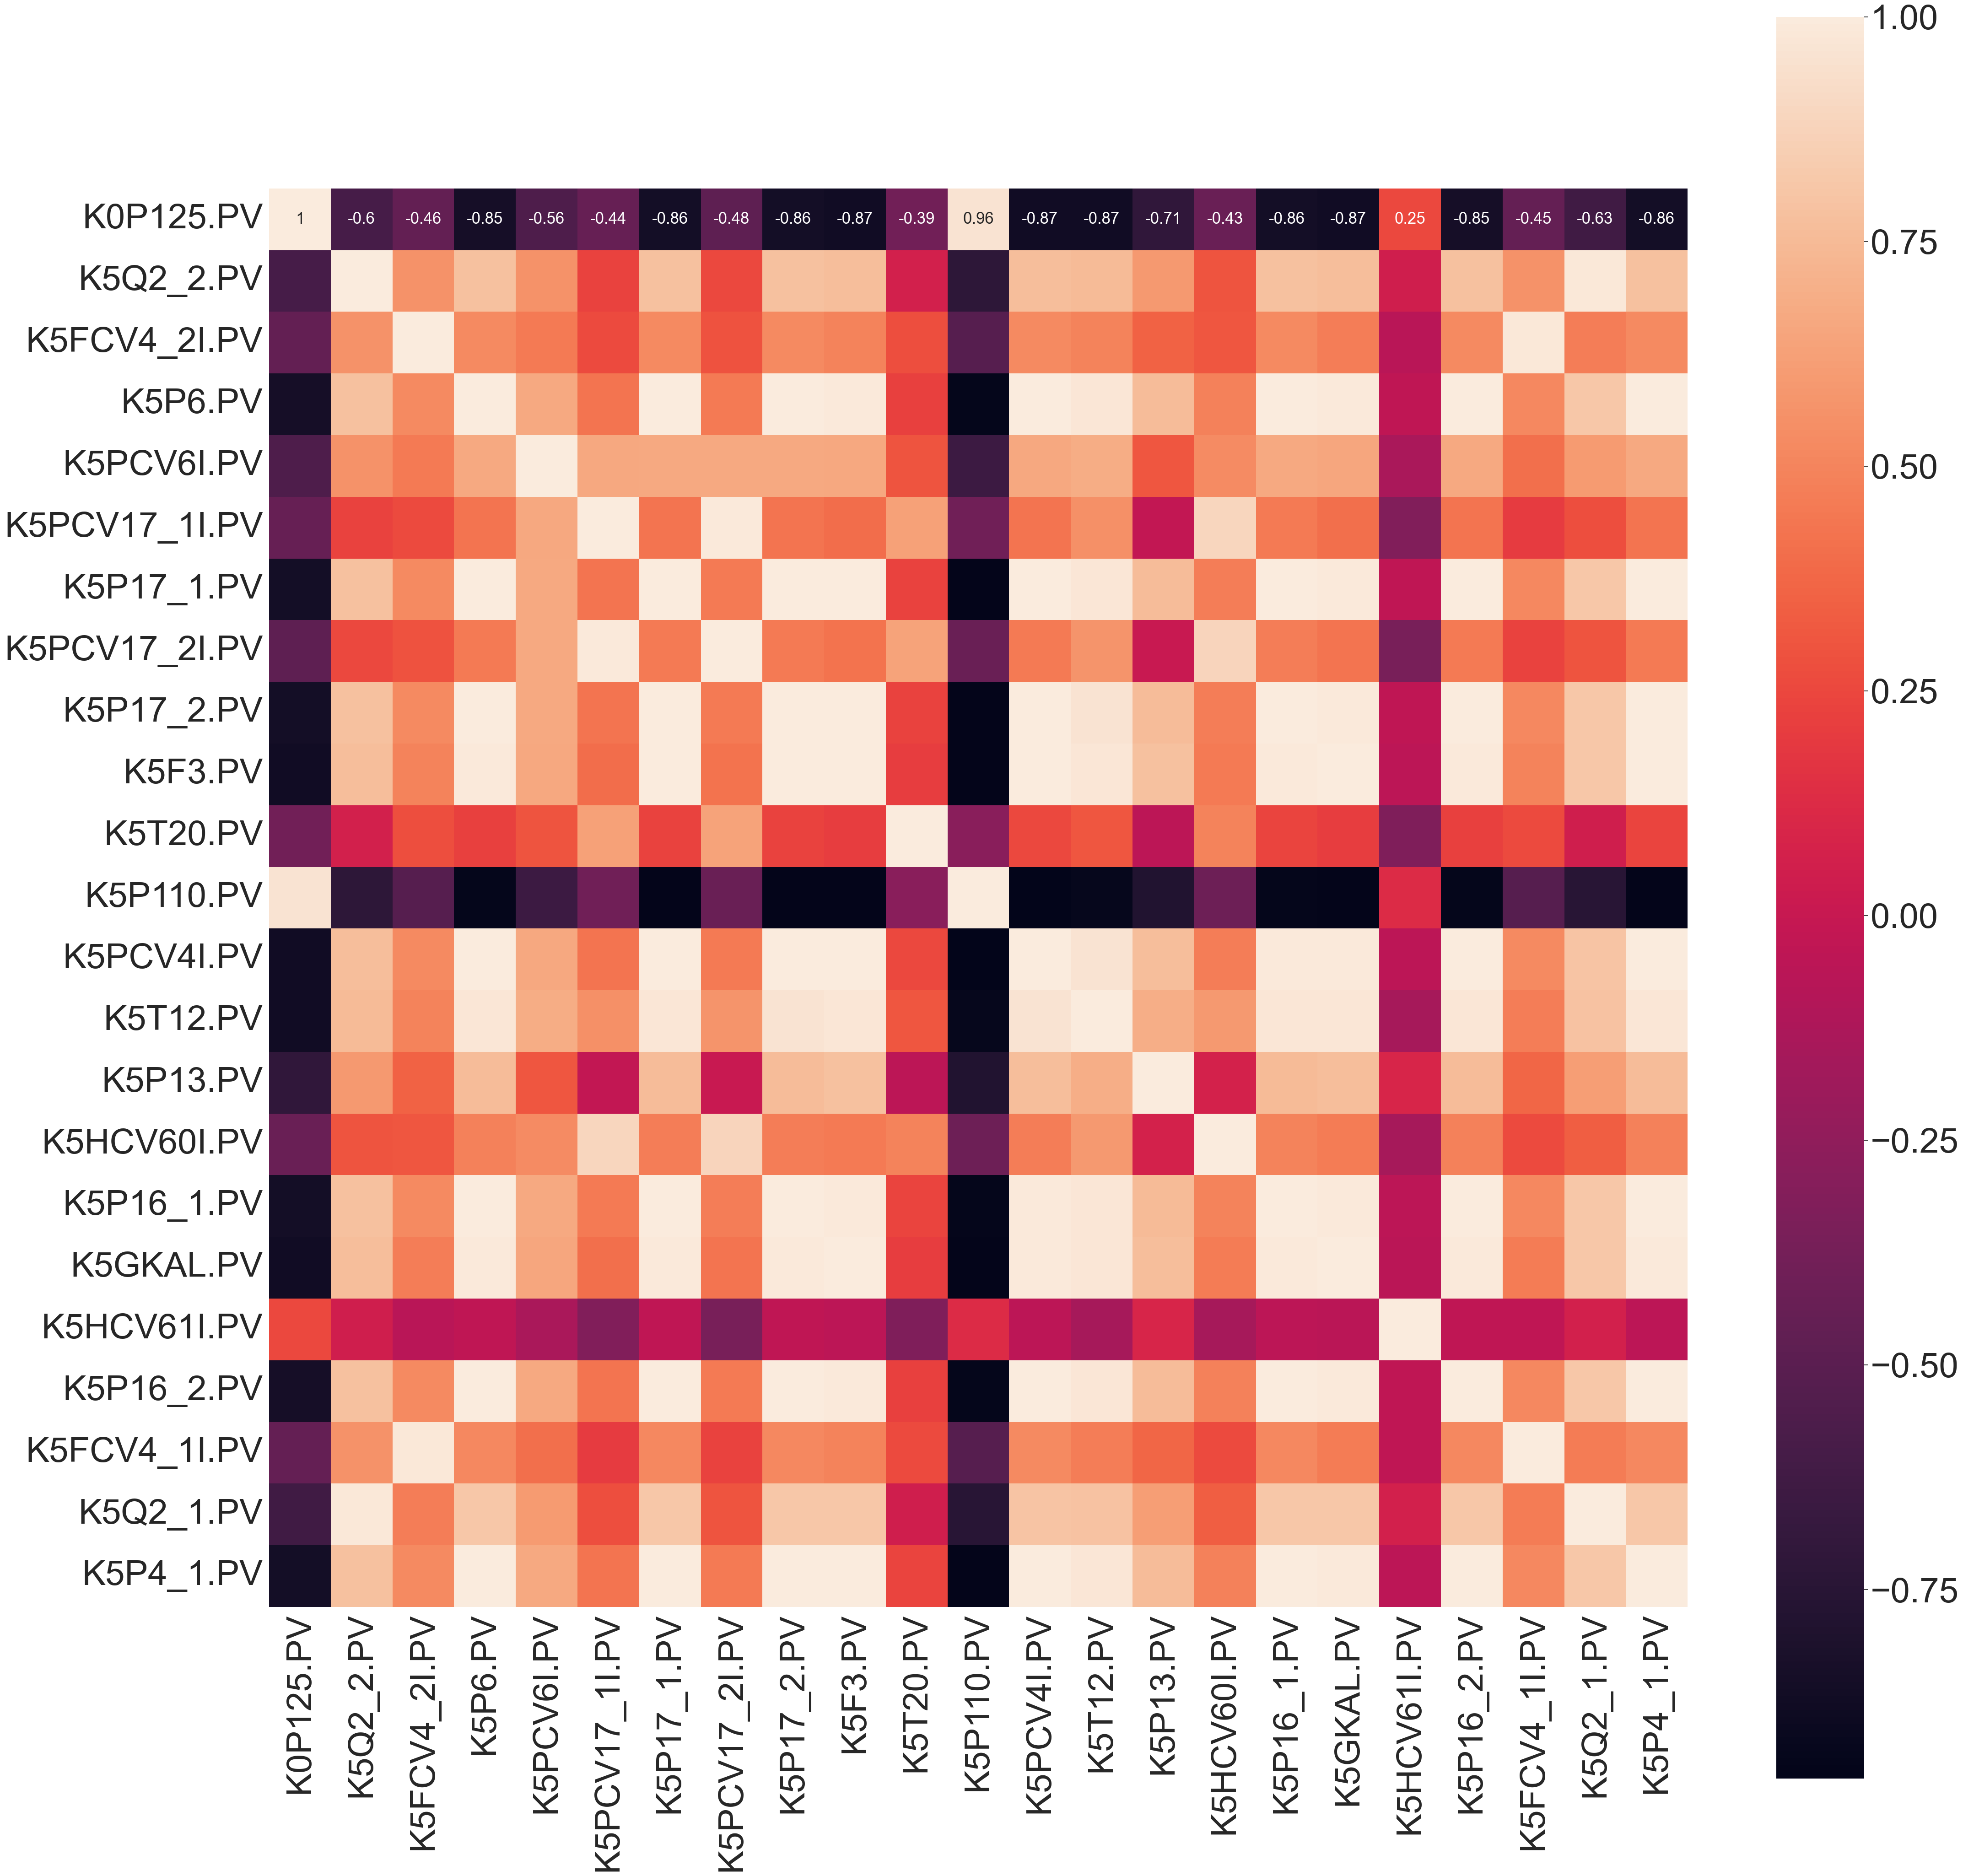

In [40]:
corrmat = df.corr().round(2)
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=5)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [41]:
corrmat["K5P4_1.PV"]

K0P125.PV       -0.86
K5Q2_2.PV        0.78
K5FCV4_2I.PV     0.52
K5P6.PV          1.00
K5PCV6I.PV       0.67
K5PCV17_1I.PV    0.43
K5P17_1.PV       1.00
K5PCV17_2I.PV    0.45
K5P17_2.PV       1.00
K5F3.PV          1.00
K5T20.PV         0.24
K5P110.PV       -0.95
K5PCV4I.PV       1.00
K5T12.PV         0.97
K5P13.PV         0.76
K5HCV60I.PV      0.48
K5P16_1.PV       1.00
K5GKAL.PV        0.99
K5HCV61I.PV     -0.05
K5P16_2.PV       1.00
K5FCV4_1I.PV     0.51
K5Q2_1.PV        0.81
K5P4_1.PV        1.00
Name: K5P4_1.PV, dtype: float64

In [48]:
df = pd.read_csv('..\Initial_data\K5P4_1\K5P4_1.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_20472\139509337.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P4_1\K5P4_1.csv', ";")


,K0P125.PV,K5PCV4I.PV,K5P4_1.PV
0,66.76884,47.51156,24.162450
1,66.68517,47.51182,24.151350
2,66.66483,47.51537,24.113700
3,66.68667,47.51005,24.105990
4,66.59383,47.50969,24.102190
...,...,...,...
24475,69.49834,23.25557,6.554271
24476,69.35817,23.01057,6.495365
24477,68.98100,23.42594,6.626615
24478,69.29175,23.24104,6.631615


In [49]:
df=df.dropna()
df=df.round(4)
df=df.drop_duplicates()
# df=df.drop_duplicates(["K0P125.PV"])
# df=df.drop_duplicates(["K5F3.PV"])
# df=df.drop_duplicates(["K5P5_1.PV"])
df 

,K0P125.PV,K5PCV4I.PV,K5P4_1.PV
0,66.7688,47.5116,24.1624
1,66.6852,47.5118,24.1514
2,66.6648,47.5154,24.1137
3,66.6867,47.5100,24.1060
4,66.5938,47.5097,24.1022
...,...,...,...
24475,69.4983,23.2556,6.5543
24476,69.3582,23.0106,6.4954
24477,68.9810,23.4259,6.6266
24478,69.2917,23.2410,6.6316


In [50]:
y = df.drop(['K0P125.PV', 'K5PCV4I.PV'], axis=1)
x = df.drop(['K5P4_1.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

In [51]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.99782107658334

In [52]:
import pickle
filename = '../model/K5P4_1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [53]:
loaded_model = pickle.load(open("../model/K5P4_1.sav", 'rb'))

In [54]:
task2 = {'K0P125.PV':[66.7], 'K5PCV4I.PV':[47.5]}
df2 = pd.DataFrame(data=task2)
df2

,K0P125.PV,K5PCV4I.PV
0,66.7,47.5


In [55]:
loaded_model.predict(df2)

array([[25.28383557]])